___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# day 103 and day 104 and day 105

# DBSCAN Project  

## The Data


Source: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

Margarida G. M. S. Cardoso, margarida.cardoso '@' iscte.pt, ISCTE-IUL, Lisbon, Portugal


Data Set Information:

Provide all relevant information about your data set.


Attribute Information:

    1) FRESH: annual spending (m.u.) on fresh products (Continuous);
    2) MILK: annual spending (m.u.) on milk products (Continuous);
    3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
    4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
    5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
    6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
    7) CHANNEL: customers  Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
    8) REGION: customers  Region Lisnon, Oporto or Other (Nominal)
 

Relevant Papers:

Cardoso, Margarida G.M.S. (2013). Logical discriminant models â€“ Chapter 8 in Quantitative Modeling in Marketing and Management Edited by Luiz Moutinho and Kun-Huang Huarng. World Scientific. p. 223-253. ISBN 978-9814407717

Jean-Patrick Baudry, Margarida Cardoso, Gilles Celeux, Maria JosÃ© Amorim, Ana Sousa Ferreira (2012). Enhancing the selection of a model-based clustering with external qualitative variables. RESEARCH REPORT NÂ° 8124, October 2012, Project-Team SELECT. INRIA Saclay - ÃŽle-de-France, Projet select, UniversitÃ© Paris-Sud 11



-----

## DBSCAN and Clustering Examples

**COMPLETE THE TASKS IN BOLD BELOW:**

**TASK: Run the following cells to import the data and view the DataFrame.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\ADMIN\\Desktop\\MACHINE LEARNING NOTEBOOKS\\DATA\\wholesome_customers_data.csv')

In [3]:
df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
df.describe()

Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.250000  
50%     1526.000000        816.500000    965.500000  
75%     3554.250000       3922.000000   1820.250000  
max    60869.000000      40827.000000  47943.000000

In [78]:
df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


# trying to know what channels are:

In [4]:
df['Channel'].value_counts()


# so 1 are expenses on restaurants,hotel and cafe
# 2 are retail expenses

1    298
2    142
Name: Channel, dtype: int64

## EDA

**TASK: Create a scatterplot showing the relation between MILK and GROCERY spending, colored by Channel column.**

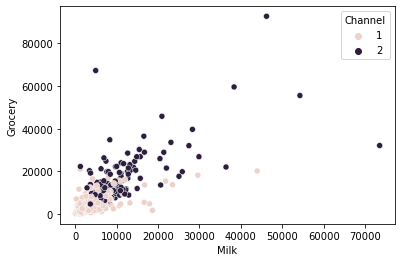

In [6]:
#CODE HERE

sns.scatterplot(data=df,x='Milk',y='Grocery',hue='Channel')

plt.show()

<AxesSubplot:xlabel='Milk', ylabel='Grocery'>

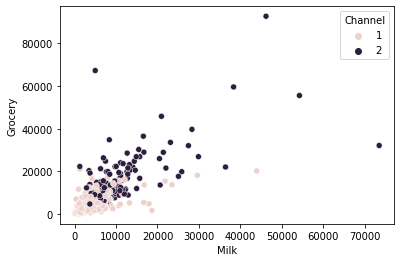

**TASK: Use seaborn to create a histogram of MILK spending, colored by Channel. Can you figure out how to use seaborn to "stack" the channels, instead of have them overlap?**

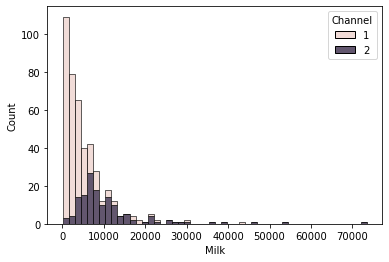

In [8]:
#CODE HERE

sns.histplot(data=df,x='Milk',hue='Channel',multiple='stack')

plt.show()

<AxesSubplot:xlabel='Milk', ylabel='Count'>

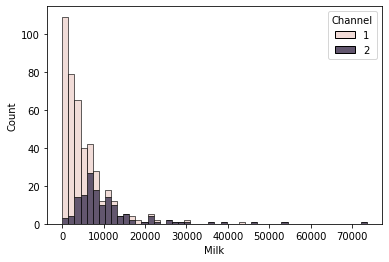

**TASK: Create an annotated clustermap of the correlations between spending on different cateogires.**

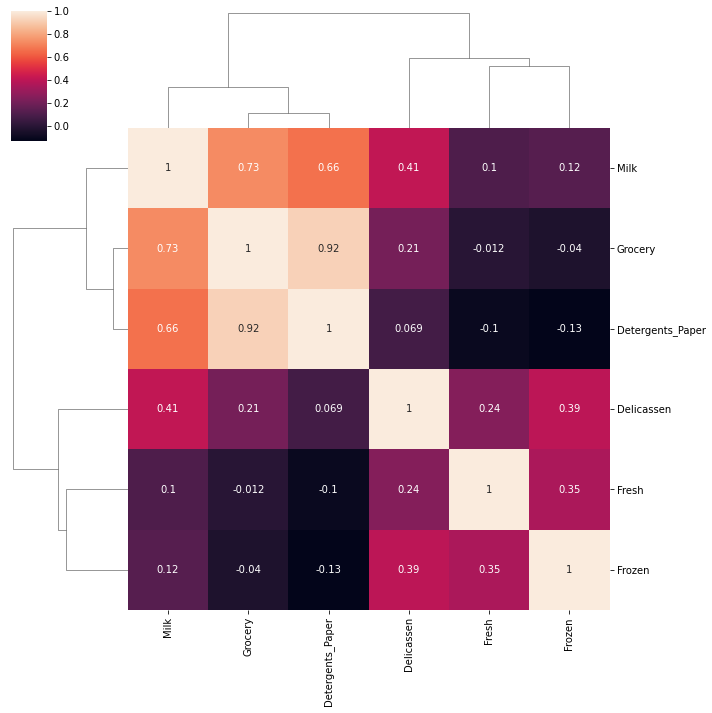

In [14]:
# CODE HERE

dropped = df.drop(['Channel','Region'],axis=1)

sns.clustermap(data=dropped.corr(),annot=True)

Correlation Between Spending Categories


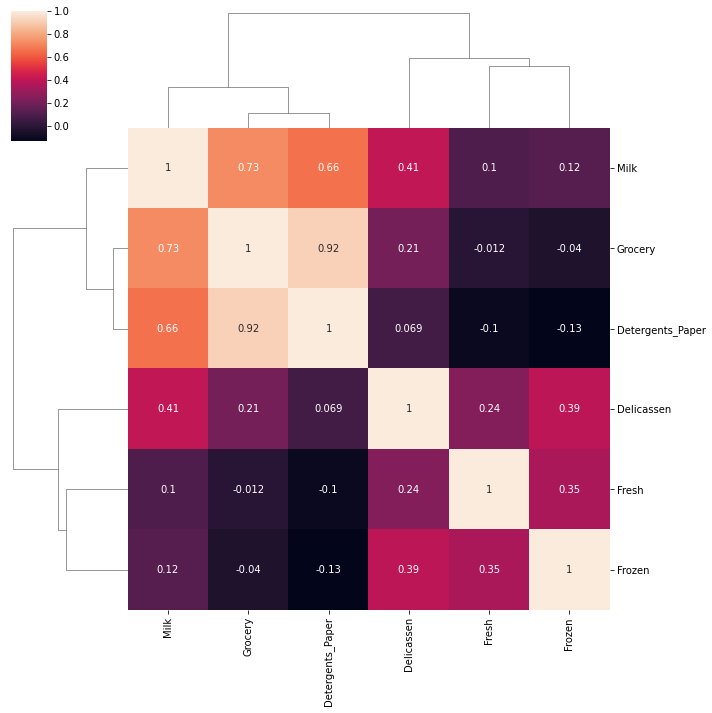

# conclusion:

**most of the expenses for detergent_paper correlated with Grocery shop**

**TASK: Create a PairPlot of the dataframe, colored by Region.**

In [18]:
df['Region'].value_counts()

# 1. Lisbon
# 2. Oporto
# 3. others

3    316
1     77
2     47
Name: Region, dtype: int64

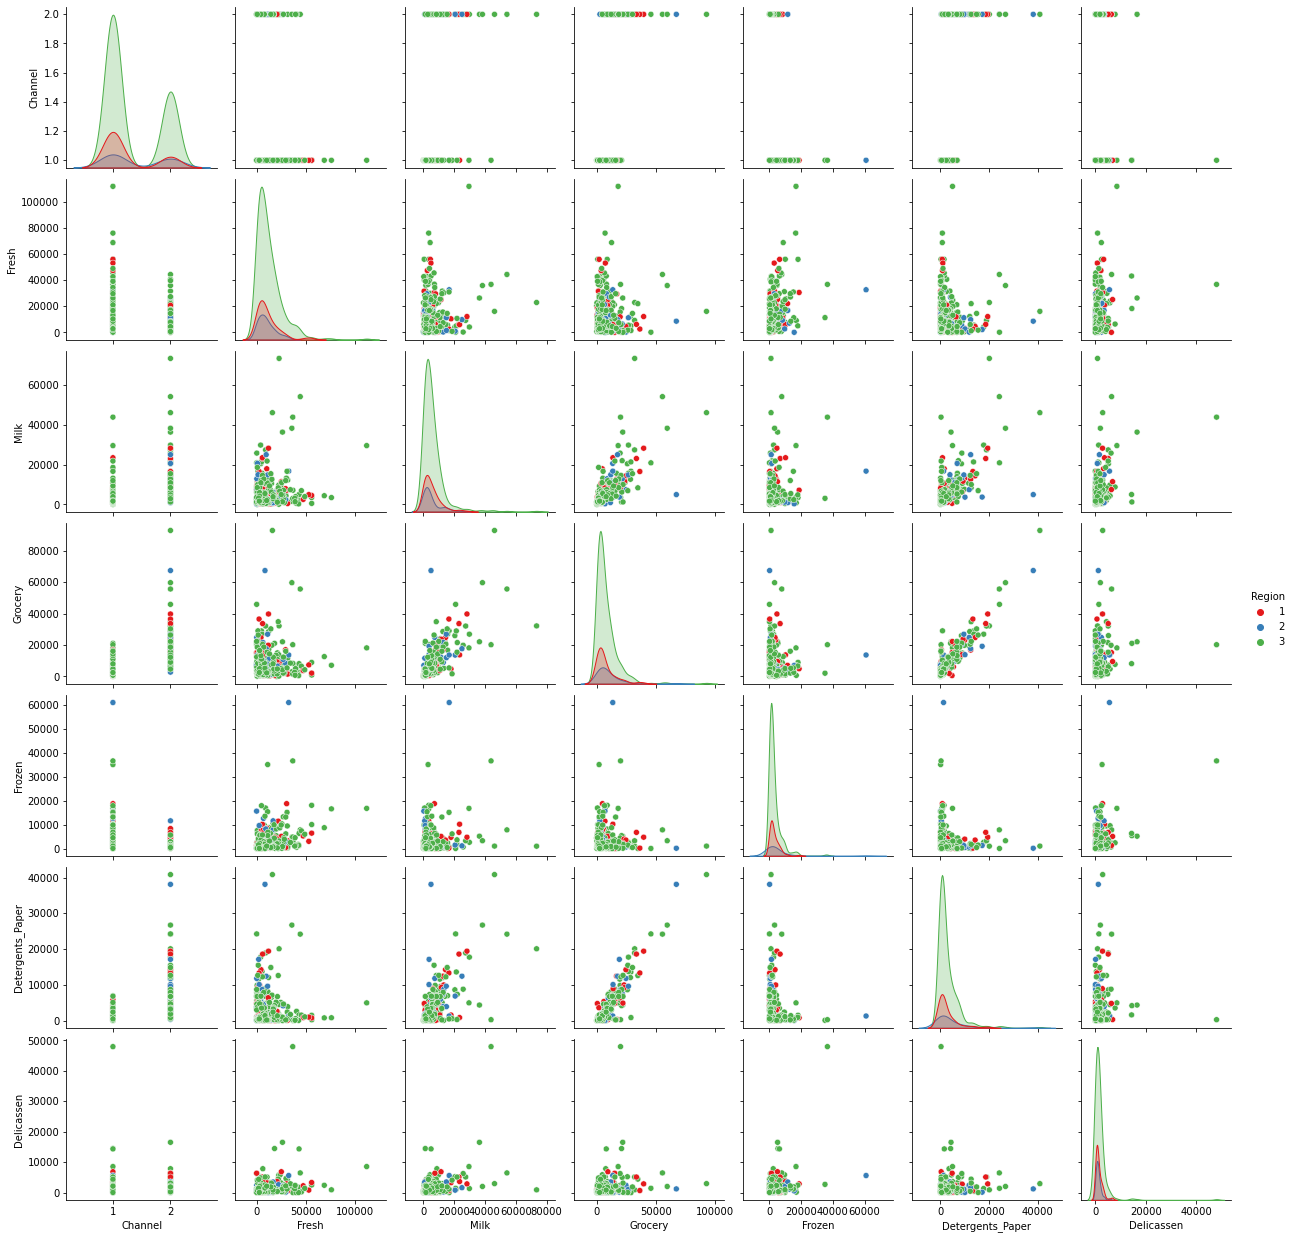

In [17]:
#CODE HERE

sns.pairplot(data=df,hue='Region',palette='Set1')

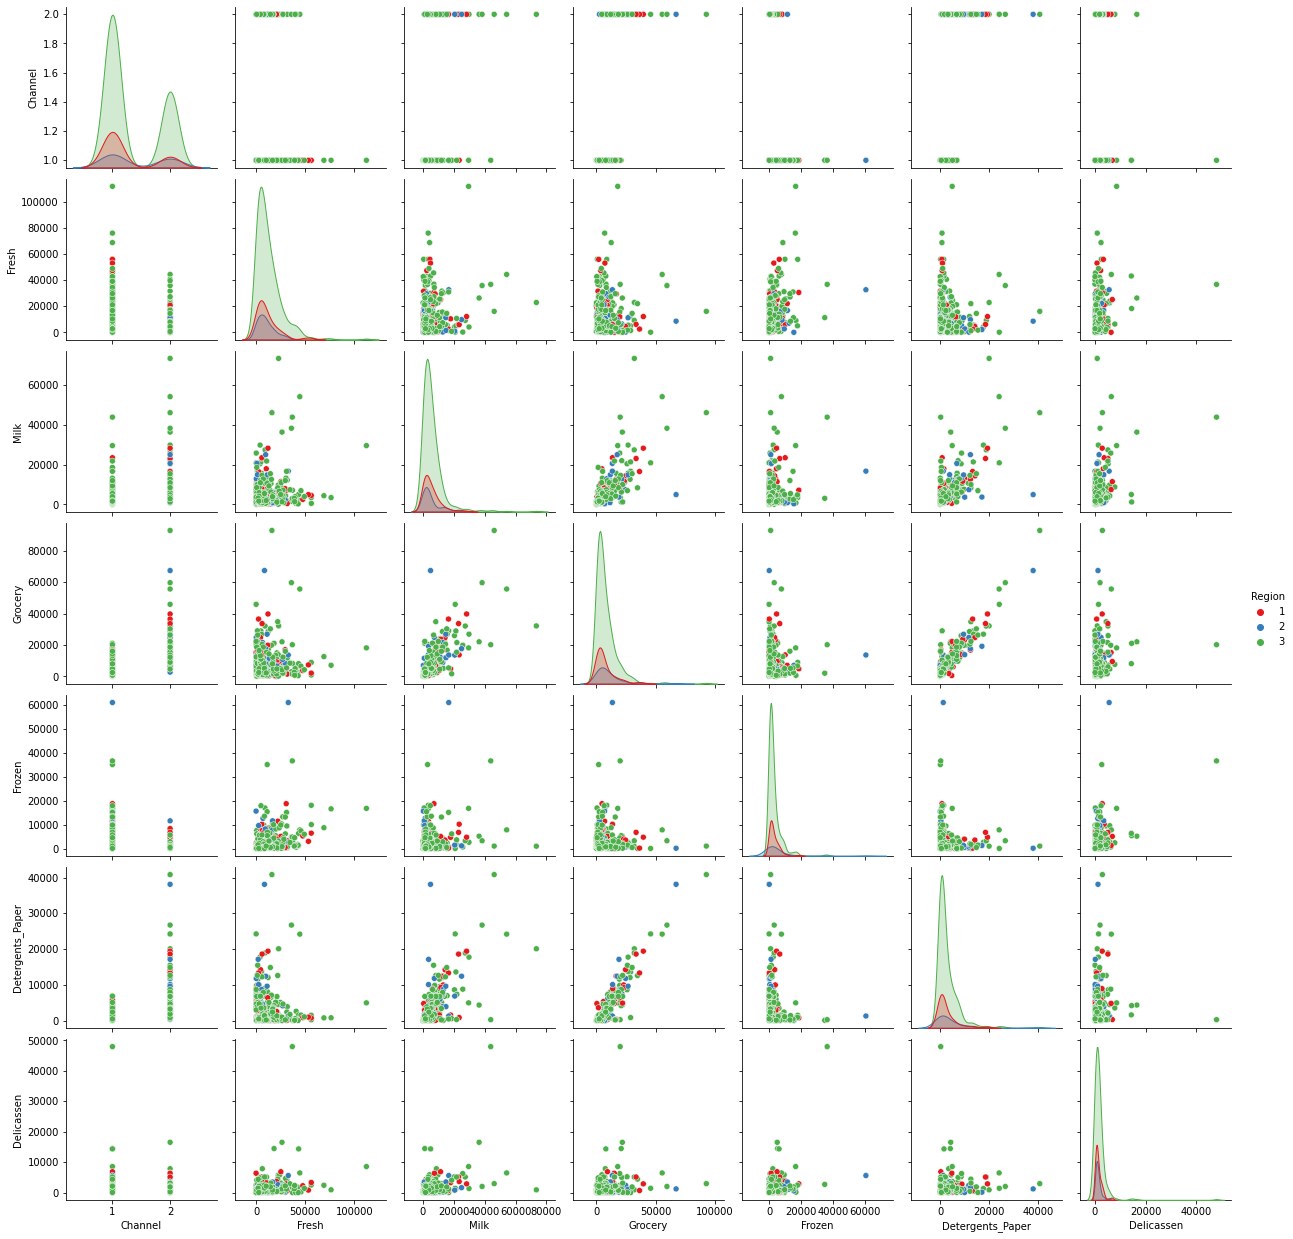

## DBSCAN

**TASK: Since the values of the features are in different orders of magnitude, let's scale the data. Use StandardScaler to scale the data.**

In [4]:
#CODE HERE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


scaled_data = scaler.fit_transform(df)

scaled_data

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

**TASK: Use DBSCAN and a for loop to create a variety of models testing different epsilon values. Set min_samples equal to 2 times the number of features. During the loop, keep track of and log the percentage of points that are outliers. For reference the solutions notebooks uses the following range of epsilon values for testing:**

    np.linspace(0.001,3,50)

In [27]:
np.shape(df)

(440, 8)

In [43]:
df

Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185  
..          ...  
435        2204  
436        2346  
437        1867  
438        2125  
439          52  

[440 rows x 8 columns]

In [6]:
#CODE HERE
n = 1000
# importing the essentials
from sklearn.cluster import DBSCAN

outliers = []

# setting the ideal number of minimum_samples
minimum = 2*np.shape(df)[1]

for i in np.linspace(0.001,3,n):
    DB = DBSCAN(eps=i,min_samples=minimum)
    
    
    # fitting the data
    
    DB.fit(scaled_data)
    
    
    # getting the outliers outliers formula: np.sum(DB.labels_==-1)
    
    outliers.append(np.sum(DB.labels_ == -1))
    
    
    
    

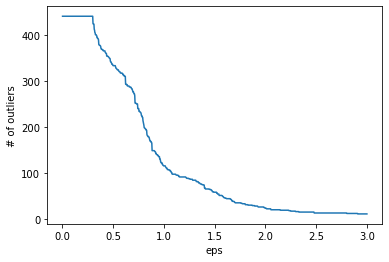

In [7]:


plt.plot(np.linspace(0.001,3,1000),outliers)

plt.xlabel('eps')
plt.ylabel('# of outliers')

# zooming in on suspected region
# plt.xlim(1,3)
# plt.ylim(10,50)


plt.show()

**TASK: Create a line plot of the percentage of outlier points versus the epsilon value choice.**

In [98]:
#CODE HERE

Text(0.5, 0, 'Epsilon Value')

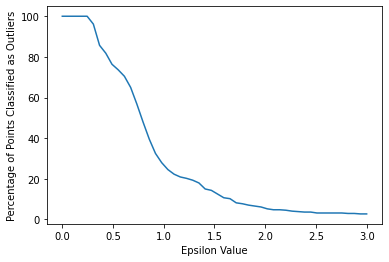

## DBSCAN with Chosen Epsilon

**TASK: Based on the plot created in the previous task, retrain a DBSCAN model with a reasonable epsilon value. Note: For reference, the solutions use eps=2.**

In [8]:
DB = DBSCAN(eps=2,min_samples=minimum)

labels = DB.fit_predict(scaled_data)



**TASK: Create a scatterplot of Milk vs Grocery, colored by the discovered labels of the DBSCAN model.**

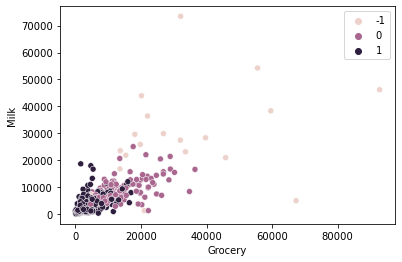

In [75]:
#CODE HERE

sns.scatterplot(data=df, x='Grocery', y='Milk',hue=labels)


plt.show()

<AxesSubplot:xlabel='Grocery', ylabel='Milk'>

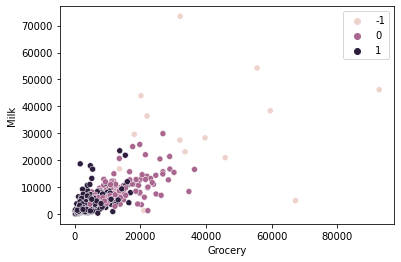

**TASK: Create a scatterplot of Milk vs. Detergents Paper colored by the labels.**

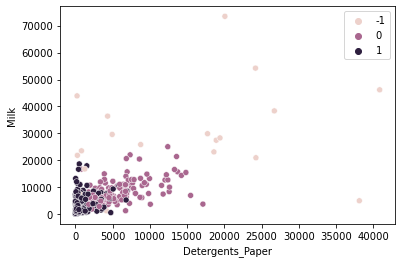

In [77]:
#CODE HERE

sns.scatterplot(data=df,x='Detergents_Paper',y='Milk',hue=labels)

plt.show()

<AxesSubplot:xlabel='Detergents_Paper', ylabel='Milk'>

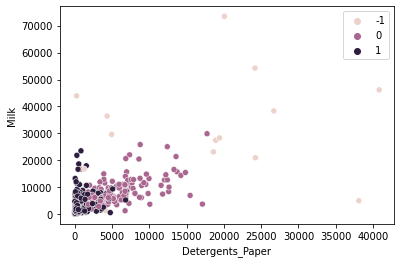

**TASK: Create a new column on the original dataframe called "Labels" consisting of the DBSCAN labels.**

In [9]:
#CODE HERE
df['Labels'] = labels

df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Labels  
0        1338       0  
1        1776       0  
2        7844       0  
3        1788       1  
4        5185       0

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Labels  
0        1338       0  
1        1776       0  
2        7844       0  
3        1788       1  
4        5185       0

**TASK: Compare the statistical mean of the clusters and outliers for the spending amounts on the categories.**

In [10]:
dropped = df.drop(['Channel','Region'],axis=1)

In [11]:
# CODE HERE


dropped_means = dropped.groupby(by='Labels').mean()

dropped_means

Fresh          Milk       Grocery        Frozen  \
Labels                                                           
-1      27729.920000  22966.960000  26609.600000  11289.640000   
 0       8227.666667   8615.852713  13859.674419   1447.759690   
 1      12326.972028   3023.559441   3655.328671   3086.181818   

        Detergents_Paper   Delicassen  
Labels                                 
-1          11173.560000  6707.160000  
 0           5969.581395  1498.457364  
 1            763.783217  1083.786713

Fresh          Milk       Grocery        Frozen  \
Labels                                                           
-1      30161.529412  26872.411765  33575.823529  12380.235294   
 0       8200.681818   8849.446970  13919.113636   1527.174242   
 1      12662.869416   3180.065292   3747.250859   3228.862543   

        Detergents_Paper   Delicassen  
Labels                                 
-1          14612.294118  8185.411765  
 0           6037.280303  1548.310606  
 1            764.697595  1125.134021

**TASK: Normalize the dataframe from the previous task using MinMaxScaler so the spending means go from 0-1 and create a heatmap of the values.**

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
min_max_scaled_dropped = scaler.fit_transform(dropped_means)

dropped_scaled_means = pd.DataFrame(data=min_max_scaled_dropped,index = dropped_means.index,columns=dropped_means.columns)

dropped_scaled_means

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
Labels                                                                      
-1      1.000000  1.000000  1.000000  1.000000          1.000000    1.000000
 0      0.000000  0.280408  0.444551  0.000000          0.500087    0.073741
 1      0.210196  0.000000  0.000000  0.166475          0.000000    0.000000

# conclusions:
**outliers are the high spenders in every single category**

<AxesSubplot:ylabel='Labels'>

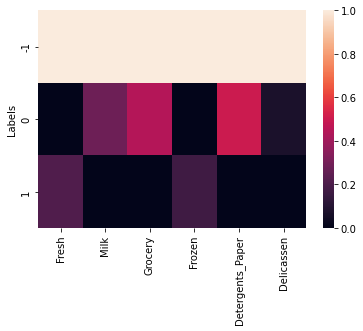

In [13]:
sns.heatmap(dropped_scaled_means)

# removing outliers from the dropped_scaled_means

In [17]:
scaled_means_outliers_stripped = dropped_scaled_means.drop(index=-1,axis=0)

scaled_means_outliers_stripped

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
Labels                                                                      
0       0.000000  0.280408  0.444551  0.000000          0.500087    0.073741
1       0.210196  0.000000  0.000000  0.166475          0.000000    0.000000

<AxesSubplot:ylabel='Labels'>

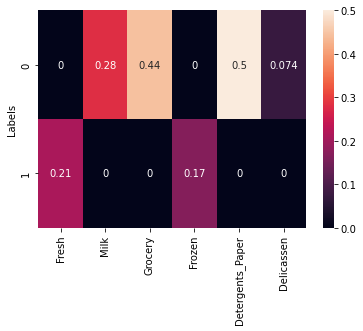

In [19]:
sns.heatmap(scaled_means_outliers_stripped,annot=True)

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
Labels                                                                      
-1      1.000000  1.000000  1.000000  1.000000          1.000000    1.000000
 0      0.000000  0.239292  0.341011  0.000000          0.380758    0.059938
 1      0.203188  0.000000  0.000000  0.156793          0.000000    0.000000

<AxesSubplot:ylabel='Labels'>

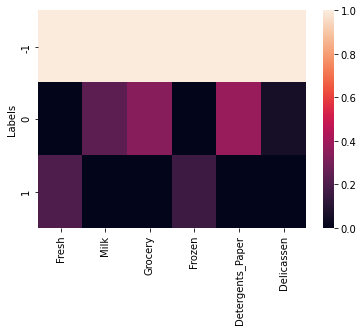

**TASK: Create another heatmap similar to the one above, but with the outliers removed**

<AxesSubplot:ylabel='Labels'>

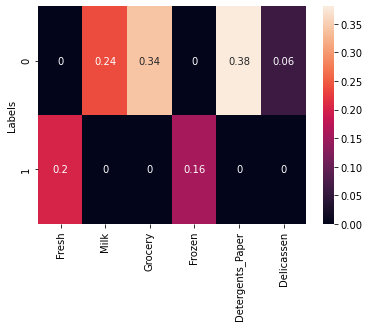

**TASK: What spending category were the two clusters mode different in?**

# conclusion:
**we got many zeros in label 1. that means label 1 has the most of non-spenders since it has more # of 0's than label 0, given that the numbers represent the spending factor of the people, and high spenders come in the category of outliers (-1).**


